In [1]:
import sim
import numpy as np
import matplotlib.pyplot as plt

sim.pretty_plots.plot_pretty()

In [2]:
c = 1
a = 200
M = 1

df = sim.halos.Sample.NFW(1000000,c=c,a=a)

rs = sim.utils.points2radius(df)

In [3]:
Rvir = 1
Rs = Rvir/c
aRvir = a * Rvir

p0 = M / 4 * np.pi * (Rs**3) * (np.log(1+c) - (c/(1+c)))
print(p0)

0.15169744087717635


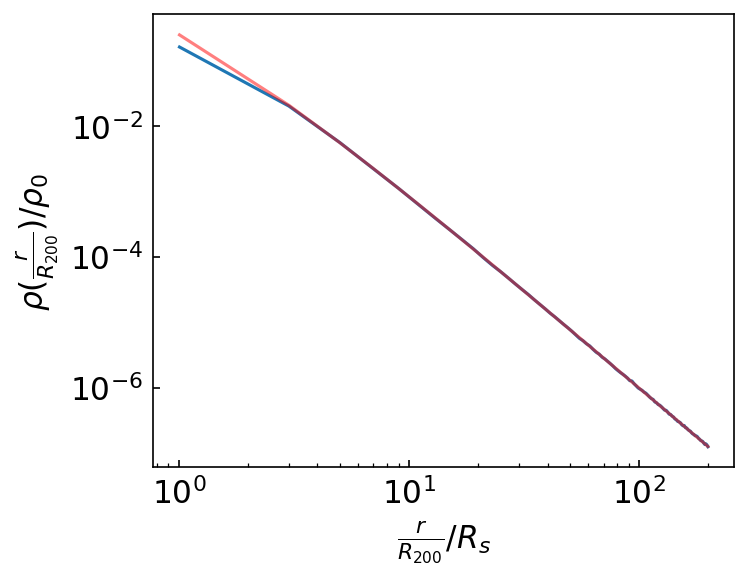

In [4]:
count,bins = np.histogram(rs,bins=100)
vols = ((4/3) * np.pi * bins[1:]**3) - ((4/3) * np.pi * bins[:-1]**3)
xs = (bins[1:] - bins[:-1])/2 + bins[:-1]
density = (count*df["mass"][0])/vols
plt.plot(xs/Rs,density/p0)
plt.plot(xs/Rs,sim.halos.Density.NFW(xs,c,M)/p0,color="red",alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\frac{r}{R_{200}}/R_s$")
plt.ylabel(r"$\rho(\frac{r}{R_{200}})/\rho_0$")
plt.show()

In [5]:
ray = sim.utils.ray(np.array([1,0,0]),6,25)
out,time = sim.static_solver.evaluate(ray,df,precision="f8")
analytics = sim.halos.Analytic.NFW(ray,c=c)

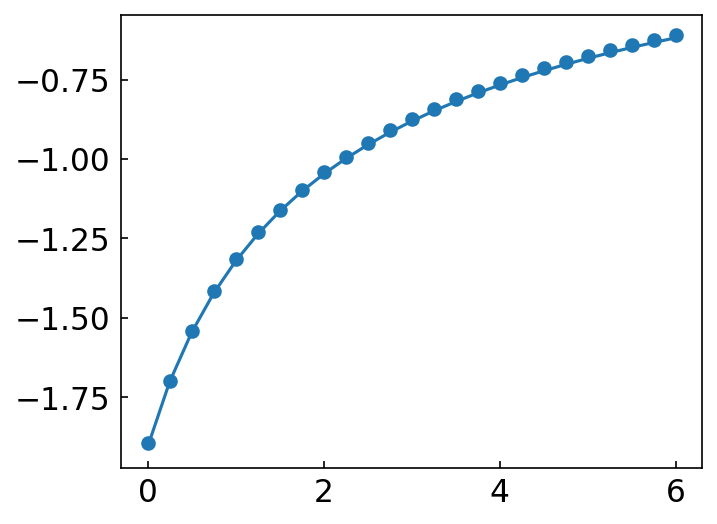

In [6]:
plt.plot(sim.utils.points2radius(ray),analytics)
plt.scatter(sim.utils.points2radius(ray),out)
plt.show()